# Hotness Plotting

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
hot_metro_data = pd.read_csv("data/RDC_MarketHotness_Monthly_Metro.csv")
regionid_data = pd.read_csv("data/CountyCrossWalk_Zillow.csv", encoding='ISO-8859-1')
top50_data = pd.read_csv("data/Affordability_Wide_2018Q3_Public.csv")

# Create DataFrames
data_metro = pd.DataFrame(hot_metro_data)
data_region = pd.DataFrame(regionid_data)
top_df = pd.DataFrame(top50_data)

# Need county or zip datasets?  

# Files to load
# hot_county_data = pd.read_csv("data/RDC_MarketHotness_Monthly_County.csv")
# hot_zip_data = pd.read_csv("data/RDC_MarketHotness_Monthly_Zip.csv")

# Create DataFrames
# data_county = pd.DataFrame(hot_county_data)
# data_zip = pd.DataFrame(hot_zip_data)

# Display the data table for preview
top_df.head(10)
data_metro.head(10)
data_region.head(10)
data_region.count()

CountyName               3144
StateName                3144
StateFIPS                3144
CountyFIPS               3144
MetroName_Zillow         1806
CBSAName                 1806
CountyRegionID_Zillow    3144
MetroRegionID_Zillow     1806
FIPS                     3144
CBSACode                 1806
dtype: int64

In [2]:
# Code to bring data from Zillow re: Price to Income and Mortgage Affordability 
regID = top_df.iloc[:, 0]
index = top_df.iloc[:, 3]
# Use last column b/c most recent data available (9/2018)
recent = top_df.iloc[:,-1]
df_dict = {"RegionID" : regID,
           "Index" : index,
          "2018-09" : recent
          }
df_afford = pd.DataFrame (df_dict)
df_afford.head()
df_afford.count()

# Separate out Price to Income and Mortgage Affordability into two DataFrames
PriceIncome_df = df_afford.loc[df_afford['Index'].str.contains('Price To Income')]
Mortgage_df = df_afford.loc[df_afford['Index'].str.contains('Mortgage')]

# Insure count = 370 each
PriceIncome_df.count()
Mortgage_df.count()

RegionID    370
Index       370
2018-09     370
dtype: int64

In [3]:
# Code for crosswalk dataset to match Zillow and Realtor.com data
reduced_df = top_df.loc[:, ["RegionID", "RegionName", "SizeRank"]]
reduced_df.head()

# Data cleaning
reduced_df.sort_values(by=['RegionID'])
dedup_list = reduced_df.drop_duplicates(subset='RegionID')
dedup_list.count()
dedup_list.head(10)
# Rename columns
data_region.head()
reg_rename = data_region.rename(index=str, 
                                columns={"MetroRegionID_Zillow": "RegionID" 
                                         }
                               )
reg_rename.head()

# Merge datasets
list_reg_df = pd.merge(dedup_list, reg_rename, on="RegionID", how="left")
list_reg_df.head(10)

# Data cleaning
dedupe_list = list_reg_df.drop_duplicates(subset='RegionID')
dedupe_list.count()
sorted_df = dedupe_list.sort_values(by=['SizeRank'])
sorted_df.head(15)
reduced_df = sorted_df.loc[(sorted_df["SizeRank"] < 51)]
reduced_df.head()
sort_df = reduced_df.sort_values(by=['RegionName'])
sort_df.head(15)
sort_df.columns

# DataFrame with Top 50 States
lkup_lst = sort_df.loc[:, ["RegionID", "RegionName", "SizeRank", "CBSAName", "CBSACode"]]
lkup_lst.head(10)

,RegionID,RegionName,SizeRank,CBSAName,CBSACode
102,394347,"Atlanta, GA",9,"Atlanta-Sandy Springs-Roswell, GA",12060.0
307,394355,"Austin, TX",35,"Austin-Round Rock, TX",12420.0
192,394358,"Baltimore, MD",20,"Baltimore-Columbia-Towson, MD",12580.0
418,394388,"Birmingham, AL",49,"Birmingham-Hoover, AL",13820.0
131,394404,"Boston, MA",10,"Boston-Cambridge-Newton, MA-NH",14460.0
413,394425,"Buffalo, NY",47,"Buffalo-Cheektowaga-Niagara Falls, NY",15380.0
223,394458,"Charlotte, NC",24,"Charlotte-Concord-Gastonia, NC-SC",16740.0
28,394463,"Chicago, IL",3,"Chicago-Naperville-Elgin, IL-IN-WI",16980.0
249,394466,"Cincinnati, OH",28,"Cincinnati, OH-KY-IN",17140.0
264,394475,"Cleveland, OH",29,"Cleveland-Elyria, OH",17460.0


In [4]:
# Code for Hotness Rank dataset (Realtor.com)
# Data cleaning
# Data types and count
data_metro.head(10)
data_metro.count()
data_metro.dtypes
# Remove n/a
data_clean = data_metro.dropna(how='any')
data_clean.count()
data_clean.dtypes
# Rename columns
data_rename = data_clean.rename(index=str, 
                                columns={"Hotness Rank ": "hrank", 
                                         "Hotness Score": "hscore",
                                         "Median Listing Price": "MedListPrice"}
                               )
# data_rename.columns
# data_rename.head()
data_sort = data_rename.sort_values(by=['hrank'])
data_sort.head()

,Month,CBSACode,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,Hotness Rank Y/Y,hscore,Supply Score,Demand Score,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
220,201812,17020,"Chico, CA",196,1.0,15.0,28.0,100.000000,100.000000,100.000000,...,-0.4559,-43.0,0.1939,0.7640,2.5738,330000.0,0.0909,0.1466,1.1419,0
285,201812,33260,"Midland, TX",260,2.0,-1.0,18.0,98.494983,97.658863,99.331104,...,-0.2000,-28.0,0.0480,0.2241,2.3279,350790.0,-0.0214,0.1288,1.2138,0
280,201812,36220,"Odessa, TX",292,3.0,1.0,41.0,94.816054,95.317726,94.314381,...,-0.1791,-25.0,0.0505,0.4444,1.7049,270000.0,0.0133,0.3171,0.9343,0
95,201812,18140,"Columbus, OH",31,4.0,-1.0,5.0,94.481605,91.638796,97.324415,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0
252,201812,23060,"Fort Wayne, IN",119,5.0,-3.0,7.0,94.314381,88.963211,99.665552,...,0.0000,-19.0,0.0068,0.3704,2.4262,179900.0,0.0000,0.1105,0.6225,0


In [5]:
# Prepare to Merge Hotness Rank dataset (Realtor.com) w/ Top 50 States
# Data cleaning
df_sort = data_rename.sort_values(by=['CBSACode'])
df_sort.head(15)
lkup_lst.sort_values(by=['CBSACode'])
lkup_lst.head(15)

# Merge datasets 
top_df = pd.merge(lkup_lst, df_sort, on="CBSACode", how="left")
top_df.head(10)
top_df.count()

RegionID                         51
RegionName                       51
SizeRank                         51
CBSAName                         50
CBSACode                         50
Month                            50
CBSATitle                        50
Nielsen HH Rank                  50
hrank                            50
Hotness Rank M/M                 50
Hotness Rank Y/Y                 50
hscore                           50
Supply Score                     50
Demand Score                     50
Median DOM                       50
Median DOM M/M                   50
Median DOM M/M Perc              50
Median DOM Y/Y                   50
Median DOM Y/Y Perc              50
Median DOM (vs US)               50
Views Per Property M/M           50
Views Per Property Y/Y           50
Views Per Property  (vs US)      50
MedListPrice                     50
Median Listing Price M/M         50
Median Listing Price Y/Y         50
Median Listing Price  (vs US)    50
Quality Flag                

In [6]:
# Merge datasets Mortgage Affordability with above DataFrame (Hotness, Top 50)
mort_top_df = pd.merge(top_df, Mortgage_df, on="RegionID", how="left")
mort_top_df.head(10)
mort_top_df.count()

# Merge datasets Price to Income with above DataFrame (Hotness, Top 50)
price_top_df = pd.merge(top_df, PriceIncome_df, on="RegionID", how="left")
price_top_df.head(10)
price_top_df.count()

RegionID                         51
RegionName                       51
SizeRank                         51
CBSAName                         50
CBSACode                         50
Month                            50
CBSATitle                        50
Nielsen HH Rank                  50
hrank                            50
Hotness Rank M/M                 50
Hotness Rank Y/Y                 50
hscore                           50
Supply Score                     50
Demand Score                     50
Median DOM                       50
Median DOM M/M                   50
Median DOM M/M Perc              50
Median DOM Y/Y                   50
Median DOM Y/Y Perc              50
Median DOM (vs US)               50
Views Per Property M/M           50
Views Per Property Y/Y           50
Views Per Property  (vs US)      50
MedListPrice                     50
Median Listing Price M/M         50
Median Listing Price Y/Y         50
Median Listing Price  (vs US)    50
Quality Flag                

In [7]:
# See Regions with High Hotness Rank (lower numbers) that are also in Top 50
data_sort = top_df.sort_values(by=['hrank'])
data_sort.head(10)

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
10,394492,"Columbus, OH",32,"Columbus, OH",18140.0,201812.0,"Columbus, OH",31.0,4.0,-1.0,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0.0
43,395057,"San Francisco, CA",11,"San Francisco-Oakland-Hayward, CA",41860.0,201812.0,"San Francisco-Oakland-Hayward, CA",11.0,6.0,2.0,...,0.1333,-29.0,0.1034,-0.2381,1.5738,855000.0,-0.0431,-0.0372,2.9585,0.0
39,395045,"Sacramento, CA",25,"Sacramento--Roseville--Arden-Arcade, CA",40900.0,201812.0,"Sacramento--Roseville--Arden-Arcade, CA",29.0,7.0,0.0,...,0.0172,-21.0,0.0863,0.0094,1.7541,449000.0,0.0090,0.0228,1.5536,0.0
4,394404,"Boston, MA",10,"Boston-Cambridge-Newton, MA-NH",14460.0,201812.0,"Boston-Cambridge-Newton, MA-NH",10.0,9.0,-4.0,...,0.0156,-15.0,0.0268,0.2523,2.1967,499900.0,-0.0014,0.0204,1.7298,0.0
13,394532,"Detroit, MI",12,"Detroit-Warren-Dearborn, MI",19820.0,201812.0,"Detroit-Warren-Dearborn, MI",12.0,13.0,-4.0,...,-0.0328,-21.0,-0.0265,-0.0213,1.5082,220000.0,-0.0276,0.0633,0.7612,0.0
11,394514,"Dallas-Fort Worth, TX",4,"Dallas-Fort Worth-Arlington, TX",19100.0,201812.0,"Dallas-Fort Worth-Arlington, TX",4.0,15.0,14.0,...,0.1017,-15.0,0.0256,-0.0196,1.6393,332590.0,-0.0070,-0.0215,1.1508,0.0
26,394902,"Nashville, TN",37,"Nashville-Davidson--Murfreesboro--Franklin, TN",34980.0,201812.0,"Nashville-Davidson--Murfreesboro--Franklin, TN",35.0,16.0,8.0,...,0.1304,-28.0,0.0241,0.1972,1.3934,349900.0,0.0000,-0.0213,1.2107,0.0
21,394807,"Louisville-Jefferson County, KY",43,"Louisville/Jefferson County, KY-IN",31140.0,201812.0,"Louisville/Jefferson County, KY-IN",42.0,18.0,-1.0,...,-0.0809,-17.5,-0.0052,0.3194,1.5574,240000.0,-0.0301,0.0946,0.8304,0.0
24,394862,"Milwaukee, WI",39,"Milwaukee-Waukesha-West Allis, WI",33340.0,201812.0,"Milwaukee-Waukesha-West Allis, WI",38.0,22.0,4.0,...,-0.1528,-19.0,0.0395,0.2267,1.5082,244900.0,-0.0165,0.1396,0.8474,0.0
47,395148,"Tampa, FL",19,"Tampa-St. Petersburg-Clearwater, FL",45300.0,201812.0,"Tampa-St. Petersburg-Clearwater, FL",17.0,28.0,10.0,...,-0.0159,-18.0,-0.0492,0.1013,1.4262,259900.0,-0.0054,-0.0004,0.8993,0.0


In [8]:
# See Regions with Low Hotness Rank (higher numbers) that are also in Top 50
data_revsort = top_df.sort_values(by=['hrank'], ascending=False)
data_revsort.head(10)

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
23,394856,"Miami-Fort Lauderdale, FL",8,"Miami-Fort Lauderdale-West Palm Beach, FL",33100.0,201812.0,"Miami-Fort Lauderdale-West Palm Beach, FL",8.0,248.0,6.0,...,-0.0430,9.0,-0.0465,0.1389,0.6721,384900.0,-0.0003,-0.0003,1.3318,0.0
49,395194,"Virginia Beach, VA",36,"Virginia Beach-Norfolk-Newport News, VA-NC",47260.0,201812.0,"Virginia Beach-Norfolk-Newport News, VA-NC",37.0,219.0,-4.0,...,-0.0506,-5.0,0.0000,0.2917,0.5082,279000.0,0.0000,0.0372,0.9654,0.0
28,394913,"New York, NY",1,"New York-Newark-Jersey City, NY-NJ-PA",35620.0,201812.0,"New York-Newark-Jersey City, NY-NJ-PA",1.0,203.0,-5.0,...,-0.0345,4.0,-0.0192,0.0625,0.8361,524900.0,-0.0078,0.1051,1.8163,0.0
15,394692,"Houston, TX",6,"Houston-The Woodlands-Sugar Land, TX",26420.0,201812.0,"Houston-The Woodlands-Sugar Land, TX",5.0,200.0,11.0,...,0.0000,-9.0,0.0526,0.2500,0.4918,307590.0,-0.0078,-0.0204,1.0643,0.0
3,394388,"Birmingham, AL",49,"Birmingham-Hoover, AL",13820.0,201812.0,"Birmingham-Hoover, AL",49.0,168.0,-8.0,...,-0.1224,6.0,-0.0496,0.5581,1.0984,219900.0,0.0000,0.1078,0.7609,0.0
17,394714,"Jacksonville, FL",40,"Jacksonville, FL",27260.0,201812.0,"Jacksonville, FL",40.0,167.0,1.0,...,0.0000,-3.0,0.0084,0.1111,0.9836,299000.0,0.0136,-0.0033,1.0346,0.0
2,394358,"Baltimore, MD",20,"Baltimore-Columbia-Towson, MD",12580.0,201812.0,"Baltimore-Columbia-Towson, MD",21.0,161.0,-10.0,...,0.0000,-8.0,-0.0275,0.1277,0.8689,298000.0,-0.0230,0.0456,1.0311,0.0
45,395078,"Seattle, WA",15,"Seattle-Tacoma-Bellevue, WA",42660.0,201812.0,"Seattle-Tacoma-Bellevue, WA",14.0,154.0,-1.0,...,0.1961,-19.0,0.0857,-0.3091,0.6230,549995.0,0.0000,0.1111,1.9031,0.0
34,394998,"Portland, OR",23,"Portland-Vancouver-Hillsboro, OR-WA",38900.0,201812.0,"Portland-Vancouver-Hillsboro, OR-WA",23.0,151.0,-7.0,...,0.0968,-12.0,0.0000,-0.0893,0.8361,453000.0,-0.0044,0.0067,1.5675,0.0
33,394982,"Pittsburgh, PA",22,"Pittsburgh, PA",38300.0,201812.0,"Pittsburgh, PA",22.0,147.0,-8.0,...,-0.0435,8.0,-0.0385,0.2931,1.2295,172900.0,-0.0120,0.0177,0.5983,0.0


In [9]:
# Clean data for graphs
top_df.count()
mort_top_df.count()
price_top_df.count()
# Remove null for graphing
# top_df = Hotness w/ top 50
not_null_df = top_df.dropna(how="any")
# price_top_df = Price to Income w/ Hotness and Top 50
price_nonull_df = price_top_df.dropna(how="any")
# mort_top_df = Mortgage Affordability w/ Hotness and Top 50
mort_nonull_df = mort_top_df.dropna(how="any")

# Make sure = 50
not_null_df.count()
price_nonull_df.count()
mort_nonull_df.count()

RegionID                         50
RegionName                       50
SizeRank                         50
CBSAName                         50
CBSACode                         50
Month                            50
CBSATitle                        50
Nielsen HH Rank                  50
hrank                            50
Hotness Rank M/M                 50
Hotness Rank Y/Y                 50
hscore                           50
Supply Score                     50
Demand Score                     50
Median DOM                       50
Median DOM M/M                   50
Median DOM M/M Perc              50
Median DOM Y/Y                   50
Median DOM Y/Y Perc              50
Median DOM (vs US)               50
Views Per Property M/M           50
Views Per Property Y/Y           50
Views Per Property  (vs US)      50
MedListPrice                     50
Median Listing Price M/M         50
Median Listing Price Y/Y         50
Median Listing Price  (vs US)    50
Quality Flag                

In [10]:
# Code to see specifically NC Regions
# top_df = Hotness w/ top 50
not_null_df = top_df.dropna(how="any")
nc_df = not_null_df.loc[not_null_df['CBSATitle'].str.contains(', NC')]
nc_sort = nc_df.sort_values(by=['hrank'])
nc_sort

# mort_top_df = Mortgage Affordability w/ Hotness and Top 50
nc_mort = mort_nonull_df.loc[mort_nonull_df['CBSATitle'].str.contains(', NC')]
nc_msort = nc_mort.sort_values(by=['hrank'])
nc_msort

# price_top_df = Price to Income w/ Hotness and Top 50

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag,Index,2018-09
6,394458,"Charlotte, NC",24,"Charlotte-Concord-Gastonia, NC-SC",16740.0,201812.0,"Charlotte-Concord-Gastonia, NC-SC",24.0,32.0,13.0,...,0.0104,0.2125,1.5902,323268.0,-0.0068,-0.0053,1.1186,0.0,Mortgage Affordability,0.155672
36,395012,"Raleigh, NC",48,"Raleigh, NC",39580.0,201812.0,"Raleigh, NC",46.0,97.0,0.0,...,-0.0119,0.1370,1.3607,339900.0,0.0000,0.0140,1.1761,0.0,Mortgage Affordability,0.170506


In [11]:
# Calculate Statistics
not_null_df.describe()
price_nonull_df.describe()
mort_nonull_df.describe()

,RegionID,SizeRank,CBSACode,Month,Nielsen HH Rank,hrank,Hotness Rank M/M,Hotness Rank Y/Y,hscore,Supply Score,...,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag,2018-09
count,50.000000,50.00000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000
mean,401986.140000,25.50000,31007.600000,201812.0,25.540000,85.080000,0.920000,-5.860000,68.217391,74.207358,...,-12.630000,0.004808,0.103440,1.246232,350087.610000,-0.012322,0.032418,1.211370,0.0,0.199327
std,50784.331125,14.57738,10703.710507,0.0,14.648549,62.620281,11.831884,33.224045,17.343836,19.095746,...,10.156334,0.037014,0.199319,0.360809,165758.940245,0.017481,0.055545,0.573563,0.0,0.086125
min,394347.000000,1.00000,12060.000000,201812.0,1.000000,4.000000,-36.000000,-97.000000,23.411371,33.444816,...,-29.000000,-0.054800,-0.468300,0.491800,170000.000000,-0.076600,-0.158400,0.588200,0.0,0.115815
25%,394530.500000,13.25000,19760.000000,201812.0,13.250000,37.250000,-4.000000,-23.750000,56.939799,63.377926,...,-19.000000,-0.020550,0.012925,1.004100,246175.000000,-0.023225,0.001675,0.851825,0.0,0.143265
50%,394883.500000,25.50000,33400.000000,201812.0,25.500000,71.000000,0.500000,-4.000000,71.906354,76.923077,...,-13.000000,0.000000,0.137950,1.204900,303770.000000,-0.007800,0.031400,1.051100,0.0,0.166696
75%,395024.250000,37.75000,39940.000000,201812.0,37.750000,132.500000,6.750000,11.250000,79.556856,88.963211,...,-7.250000,0.022300,0.227150,1.508200,384975.000000,-0.000100,0.065175,1.332100,0.0,0.228828
max,753899.000000,50.00000,47900.000000,201812.0,52.000000,248.000000,29.000000,57.000000,94.481605,99.331104,...,9.000000,0.103400,0.558100,2.196700,999999.000000,0.018000,0.139600,3.460200,0.0,0.507115


In [12]:
# Look at Regions with Highest and Lowest Median Listing Price
# not_null_df = Hotness w/ top 50
# Higher than Median List Price
listing_high = not_null_df.loc[(not_null_df["MedListPrice"] > (not_null_df["MedListPrice"].median()))]
list_high_sort = listing_high.sort_values(by=['MedListPrice'])
list_high_sort.head(10)
# Lower than Median List Price
listing_low = not_null_df.loc[(not_null_df["MedListPrice"] < (not_null_df["MedListPrice"].median()))]
list_low_sort = listing_low.sort_values(by=['MedListPrice'])
list_low_sort.head(10)

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Median DOM Y/Y Perc,Median DOM (vs US),Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag
9,394475,"Cleveland, OH",29,"Cleveland-Elyria, OH",17460.0,201812.0,"Cleveland-Elyria, OH",26.0,45.0,-3.0,...,-0.0759,-7.0,-0.0291,0.3514,1.6393,170000.0,-0.0286,0.0658,0.5882,0.0
33,394982,"Pittsburgh, PA",22,"Pittsburgh, PA",38300.0,201812.0,"Pittsburgh, PA",22.0,147.0,-8.0,...,-0.0435,8.0,-0.0385,0.2931,1.2295,172900.0,-0.0120,0.0177,0.5983,0.0
5,394425,"Buffalo, NY",47,"Buffalo-Cheektowaga-Niagara Falls, NY",15380.0,201812.0,"Buffalo-Cheektowaga-Niagara Falls, NY",47.0,31.0,1.0,...,-0.0147,-13.0,-0.0355,0.1585,1.5574,174900.0,-0.0278,0.0600,0.6052,0.0
46,395121,"St. Louis, MO",18,"St. Louis, MO-IL",41180.0,201812.0,"St. Louis, MO-IL",19.0,135.0,-21.0,...,0.0541,-2.0,0.0070,0.1803,1.1803,199900.0,-0.0244,0.0805,0.6917,0.0
22,394849,"Memphis, TN",41,"Memphis, TN-MS-AR",32820.0,201812.0,"Memphis, TN-MS-AR",43.0,38.0,26.0,...,-0.0533,-9.0,0.0316,0.3067,1.6066,205000.0,-0.0284,0.0864,0.7093,0.0
3,394388,"Birmingham, AL",49,"Birmingham-Hoover, AL",13820.0,201812.0,"Birmingham-Hoover, AL",49.0,168.0,-8.0,...,-0.1224,6.0,-0.0496,0.5581,1.0984,219900.0,0.0000,0.1078,0.7609,0.0
13,394532,"Detroit, MI",12,"Detroit-Warren-Dearborn, MI",19820.0,201812.0,"Detroit-Warren-Dearborn, MI",12.0,13.0,-4.0,...,-0.0328,-21.0,-0.0265,-0.0213,1.5082,220000.0,-0.0276,0.0633,0.7612,0.0
10,394492,"Columbus, OH",32,"Columbus, OH",18140.0,201812.0,"Columbus, OH",31.0,4.0,-1.0,...,-0.0167,-21.0,0.0000,-0.0569,1.9016,229900.0,-0.0402,0.0455,0.7955,0.0
8,394466,"Cincinnati, OH",28,"Cincinnati, OH-KY-IN",17140.0,201812.0,"Cincinnati, OH-KY-IN",28.0,40.0,6.0,...,-0.0870,-17.0,-0.0061,0.2857,1.3279,233500.0,-0.0253,0.0860,0.8080,0.0
29,394935,"Oklahoma City, OK",42,"Oklahoma City, OK",36420.0,201812.0,"Oklahoma City, OK",41.0,128.0,3.0,...,-0.0667,-10.0,-0.0240,0.2449,1.0000,234000.0,-0.0158,0.0400,0.8097,0.0


In [13]:
# Hotness Rating, only hottest (i.e. rank within the top 100)
# not_null_df = Hotness w/ top 50
hrank_high = not_null_df.loc[(not_null_df["hrank"] <= 100)]
# Sort by Median Listing Price
sort_hrank = hrank_high.sort_values(by=['MedListPrice'])
sort_hrank.head(10)
# mort_nonull_df = Mortgage Affordability w/ Hotness and top 50
mort_hrank_high = mort_nonull_df.loc[(not_null_df["hrank"] <= 100)]
# Sort by Mortgage Affordability
mort_sort_hrank = mort_hrank_high.sort_values(by=['2018-09'])
mort_sort_hrank.head(10)
mort_sort_hrank.count()

RegionID                         33
RegionName                       33
SizeRank                         33
CBSAName                         33
CBSACode                         33
Month                            33
CBSATitle                        33
Nielsen HH Rank                  33
hrank                            33
Hotness Rank M/M                 33
Hotness Rank Y/Y                 33
hscore                           33
Supply Score                     33
Demand Score                     33
Median DOM                       33
Median DOM M/M                   33
Median DOM M/M Perc              33
Median DOM Y/Y                   33
Median DOM Y/Y Perc              33
Median DOM (vs US)               33
Views Per Property M/M           33
Views Per Property Y/Y           33
Views Per Property  (vs US)      33
MedListPrice                     33
Median Listing Price M/M         33
Median Listing Price Y/Y         33
Median Listing Price  (vs US)    33
Quality Flag                

In [41]:
nc_msort.count()

RegionID                         2
RegionName                       2
SizeRank                         2
CBSAName                         2
CBSACode                         2
Month                            2
CBSATitle                        2
Nielsen HH Rank                  2
hrank                            2
Hotness Rank M/M                 2
Hotness Rank Y/Y                 2
hscore                           2
Supply Score                     2
Demand Score                     2
Median DOM                       2
Median DOM M/M                   2
Median DOM M/M Perc              2
Median DOM Y/Y                   2
Median DOM Y/Y Perc              2
Median DOM (vs US)               2
Views Per Property M/M           2
Views Per Property Y/Y           2
Views Per Property  (vs US)      2
MedListPrice                     2
Median Listing Price M/M         2
Median Listing Price Y/Y         2
Median Listing Price  (vs US)    2
Quality Flag                     2
Index               

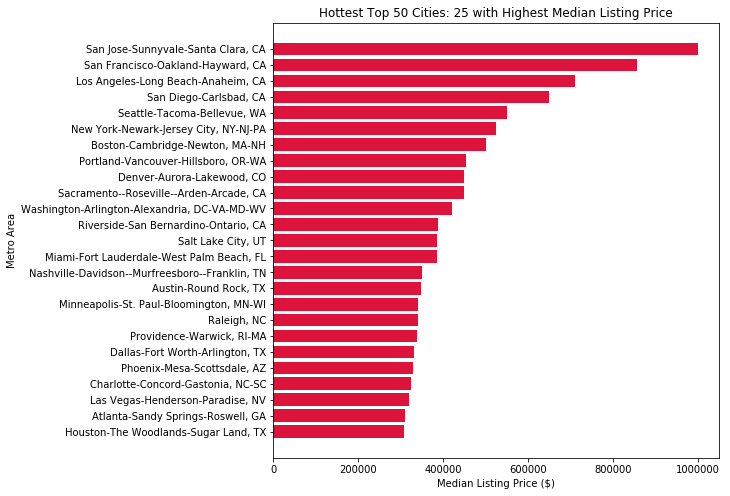

In [18]:
# Graph - Hottest Top 50 Cities: 25 with Highest Median Listing Price
# Obtain the x and y coordinates
x_axis = list_high_sort['CBSATitle']
y_axis = list_high_sort['MedListPrice']
tick_locations = [value for value in x_axis]

plt.figure(figsize=[8, 8])

plt.barh(x_axis, y_axis, color="crimson", align="center")
plt.yticks(tick_locations, list_high_sort['CBSATitle'], rotation='horizontal')

# Set a Title and labels
plt.title("Hottest Top 50 Cities: 25 with Highest Median Listing Price")
plt.xlabel("Median Listing Price ($)")
plt.ylabel("Metro Area")

plt.show()

# Save figure
# plt.savefig("high_med.png")

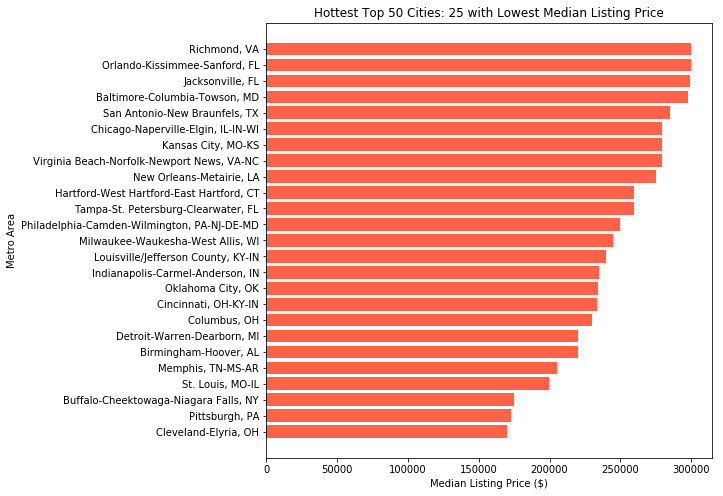

In [19]:
# Graph - Hottest Top 50 Cities: 25 with Lowest Median Listing Price
# Obtain the x and y coordinates
x_axis = list_low_sort['CBSATitle']
y_axis = list_low_sort['MedListPrice']
tick_locations = [value for value in x_axis]

plt.figure(figsize=[8, 8])

plt.barh(x_axis, y_axis, color="tomato", align="center")
plt.yticks(tick_locations, list_low_sort['CBSATitle'], rotation='horizontal')

# Set a Title and labels
plt.title("Hottest Top 50 Cities: 25 with Lowest Median Listing Price")
plt.xlabel("Median Listing Price ($)")
plt.ylabel("Metro Area")

plt.show()

# Save figure
# plt.savefig("low_med.png")

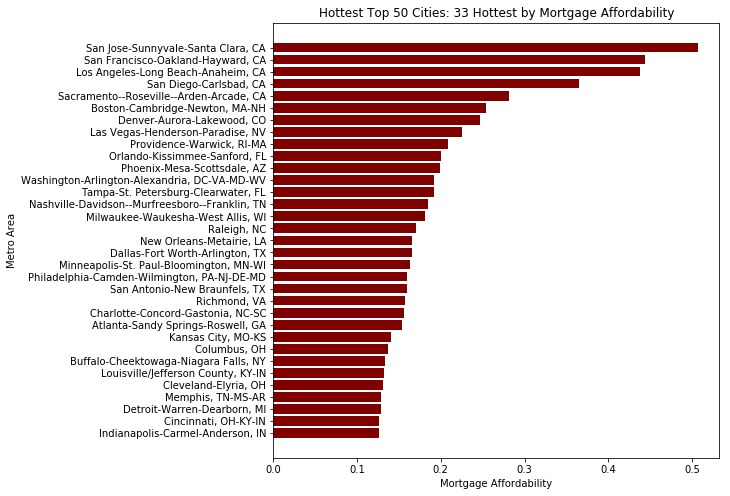

<Figure size 432x288 with 0 Axes>

In [22]:
# Graph - Hottest Top 50 Cities: 33 Hottest by Mortgage Affordability
# Obtain the x and y coordinates for NC
x_axis = mort_sort_hrank['CBSATitle']
y_axis = mort_sort_hrank['2018-09']
tick_locations = [value for value in x_axis]

plt.figure(figsize=[8, 8])

plt.barh(x_axis, y_axis, color="maroon", align="center")
plt.yticks(tick_locations, mort_sort_hrank['CBSATitle'], rotation="horizontal")

# Set a Title and labels
plt.title("Hottest Top 50 Cities: 33 Hottest by Mortgage Affordability")
plt.xlabel("Mortgage Affordability")
plt.ylabel("Metro Area")


plt.show()
plt.tight_layout()

# Save figure
# plt.savefig("afford_hot.png")

Text(0, 0.5, 'Mortgage Affordability')

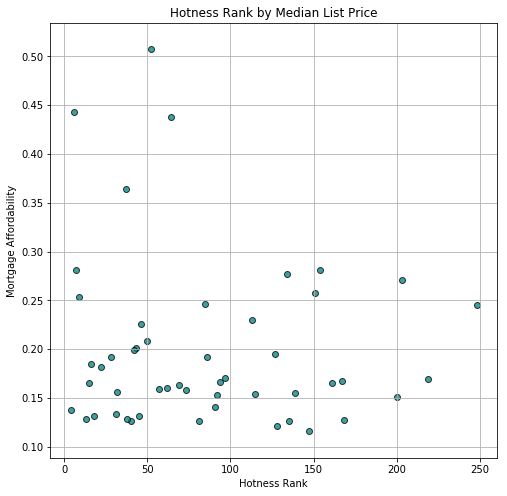

In [43]:
# Obtain the x and y coordinates for each of the three city types
# Hottest rank <= 100
# x_axis_h = mort_hrank_high['hrank']
# y_axis_h = mort_hrank_high['2018-09']
# Mortgage Affordability w/ Hotness and top 50
x_axis_a = mort_nonull_df['hrank']
y_axis_a = mort_nonull_df['2018-09']

plt.figure(figsize=[8, 8])

# Build the scatter plots for each city types
# plt.scatter(x_axis_h, y_axis_h, marker="o",facecolors="lightcoral", 
#             edgecolors="black", label="Hottest", alpha=0.75)
plt.scatter(x_axis_a, y_axis_a, marker="o", facecolors="teal", 
            edgecolors="black", label="All", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
# Create a legend

# Incorporate a text label regarding circle size
plt.title("Hotness Rank by Median List Price")
plt.xlabel("Hotness Rank")
plt.ylabel("Mortgage Affordability")

# Save Figure
# plt.savefig("Hotness_MedList_Afford.png")

In [53]:
mort_nonull_df["RegionName"].value_counts()
mort_nonull_df.head()

,RegionID,RegionName,SizeRank,CBSAName,CBSACode,Month,CBSATitle,Nielsen HH Rank,hrank,Hotness Rank M/M,...,Views Per Property M/M,Views Per Property Y/Y,Views Per Property (vs US),MedListPrice,Median Listing Price M/M,Median Listing Price Y/Y,Median Listing Price (vs US),Quality Flag,Index,2018-09
0,394347,"Atlanta, GA",9,"Atlanta-Sandy Springs-Roswell, GA",12060.0,201812.0,"Atlanta-Sandy Springs-Roswell, GA",9.0,92.0,29.0,...,0.0714,0.1111,0.9836,311427.0,-0.0113,0.0384,1.0776,0.0,Mortgage Affordability,0.153327
1,394355,"Austin, TX",35,"Austin-Round Rock, TX",12420.0,201812.0,"Austin-Round Rock, TX",34.0,127.0,11.0,...,0.0154,0.1000,1.0820,349000.0,-0.0026,-0.0306,1.2076,0.0,Mortgage Affordability,0.194589
2,394358,"Baltimore, MD",20,"Baltimore-Columbia-Towson, MD",12580.0,201812.0,"Baltimore-Columbia-Towson, MD",21.0,161.0,-10.0,...,-0.0275,0.1277,0.8689,298000.0,-0.0230,0.0456,1.0311,0.0,Mortgage Affordability,0.165808
3,394388,"Birmingham, AL",49,"Birmingham-Hoover, AL",13820.0,201812.0,"Birmingham-Hoover, AL",49.0,168.0,-8.0,...,-0.0496,0.5581,1.0984,219900.0,0.0000,0.1078,0.7609,0.0,Mortgage Affordability,0.127721
4,394404,"Boston, MA",10,"Boston-Cambridge-Newton, MA-NH",14460.0,201812.0,"Boston-Cambridge-Newton, MA-NH",10.0,9.0,-4.0,...,0.0268,0.2523,2.1967,499900.0,-0.0014,0.0204,1.7298,0.0,Mortgage Affordability,0.253796


In [65]:
# Pull out City data for OpenWeatherMap
cities_state_df = mort_nonull_df["RegionName"].str.split(', ', expand=True)
cities_split = cities_state_df.loc[:,0].str.split('-', expand=True)
cities = cities_split.loc[:,0]
cities

0            Atlanta
1             Austin
2          Baltimore
3         Birmingham
4             Boston
5            Buffalo
6          Charlotte
7            Chicago
8         Cincinnati
9          Cleveland
10          Columbus
11            Dallas
12            Denver
13           Detroit
14          Hartford
15           Houston
16      Indianapolis
17      Jacksonville
18       Kansas City
19         Las Vegas
20       Los Angeles
21        Louisville
22           Memphis
23             Miami
24         Milwaukee
25       Minneapolis
26         Nashville
27       New Orleans
28          New York
29     Oklahoma City
30           Orlando
31      Philadelphia
32           Phoenix
33        Pittsburgh
34          Portland
35        Providence
36           Raleigh
37          Richmond
38         Riverside
39        Sacramento
40    Salt Lake City
41       San Antonio
42         San Diego
43     San Francisco
44          San Jose
45           Seattle
46         St. Louis
47           

In [66]:
# API call
# Dependencies and Setup
import requests
import time

# Import API key
from config import api_key

# Hotness v. "Hotness" (Max Temp)
# Save config information.
url = "http://api.openweathermap.org/data/2.5/find?"

# Create settings dictionary with information we're interested in
units = "imperial"

settings = {"appid" : api_key,
            "units" : units
           }

# set up lists to hold reponse info
name = []
lat = []
lon = []
temp = []
humid = []
wind = []
clouds = []
date = []

# print Report header
print(f"Beginning Data Retrieval")
print("-----------------------------")  

# Loop through the list of cities and perform a request for data on each
for x, city in enumerate(cities):
      
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={api_key}&units={units}&q="


    # assemble url and make API request  
    response = requests.get(query_url + city).json()


    # extract results
    try:
        print(f"Processing Record {x} | {city}") 

        name.append(response['list'][0]['name'])
        lat.append(response['list'][0]['coord']['lat'])
        lon.append(response['list'][0]['coord']['lon'])
        temp.append(response['list'][0]['main']['temp_max'])
        humid.append(response['list'][0]['main']['humidity'])
        wind.append(response['list'][0]['wind']['speed'])
        clouds.append(response['list'][0]['clouds']['all'])
        date.append(response['list'][0]['dt'])
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
                
# print out at conclusion
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | Atlanta
Processing Record 1 | Austin
Processing Record 2 | Baltimore
Processing Record 3 | Birmingham
Processing Record 4 | Boston
Processing Record 5 | Buffalo
Processing Record 6 | Charlotte
Processing Record 7 | Chicago
Processing Record 8 | Cincinnati
Processing Record 9 | Cleveland
Processing Record 10 | Columbus
Processing Record 11 | Dallas
Processing Record 12 | Denver
Processing Record 13 | Detroit
Processing Record 14 | Hartford
Processing Record 15 | Houston
Processing Record 16 | Indianapolis
Processing Record 17 | Jacksonville
Processing Record 18 | Kansas City
Processing Record 19 | Las Vegas
Processing Record 20 | Los Angeles
Processing Record 21 | Louisville
Processing Record 22 | Memphis
Processing Record 23 | Miami
Processing Record 24 | Milwaukee
Processing Record 25 | Minneapolis
Processing Record 26 | Nashville
Processing Record 27 | New Orleans
Processing Record 28 | New York
Processing R

In [68]:
# Convert to DataFrame
weather_dict = {
    "CityName": name,
    "Cloudiness": clouds, 
    "Date": date,
    "Humidity": humid,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Wind Speed": wind    
}

weather_data = pd.DataFrame(weather_dict)

# Export to csv
# weather_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

weather_data.count()
weather_data

,CityName,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atlanta,1,1547693760,85,33.7491,-84.3902,41.00,2.51
1,Austin,90,1547693700,93,30.2711,-97.7437,57.02,2.84
2,Baltimore,90,1547694000,64,39.2909,-76.6108,39.92,5.82
3,Birmingham,1,1547693760,82,33.5207,-86.8025,39.92,3.40
4,Boston,20,1547693760,39,42.3603,-71.0583,35.96,17.22
5,Buffalo,40,1547693640,67,42.8867,-78.8784,19.40,3.36
6,Charlotte,75,1547694300,62,35.2271,-80.8432,44.06,1.72
7,Chicago,90,1547693700,68,41.8756,-87.6245,32.00,11.41
8,Cincinnati,90,1547693700,85,39.1015,-84.5125,33.98,2.95
9,Cleveland,90,1547693760,65,41.5052,-81.6935,26.96,10.29


In [81]:
# Merge weather_data with Mortgage Affordability DataFrame
reduct_mort_df = mort_nonull_df.loc[:, ["RegionID", "RegionName", "hrank", "2018-09"]]
reduct_mort_df["CityName"] = cities
reduct_mort_df
# Merge datasets
mort_wx_df = pd.merge(weather_data, reduct_mort_df, on="CityName", how="left")
mort_wx_df.head(10)

,CityName,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,RegionID,RegionName,hrank,2018-09
0,Atlanta,1,1547693760,85,33.7491,-84.3902,41.00,2.51,394347.0,"Atlanta, GA",92.0,0.153327
1,Austin,90,1547693700,93,30.2711,-97.7437,57.02,2.84,394355.0,"Austin, TX",127.0,0.194589
2,Baltimore,90,1547694000,64,39.2909,-76.6108,39.92,5.82,394358.0,"Baltimore, MD",161.0,0.165808
3,Birmingham,1,1547693760,82,33.5207,-86.8025,39.92,3.40,394388.0,"Birmingham, AL",168.0,0.127721
4,Boston,20,1547693760,39,42.3603,-71.0583,35.96,17.22,394404.0,"Boston, MA",9.0,0.253796
5,Buffalo,40,1547693640,67,42.8867,-78.8784,19.40,3.36,394425.0,"Buffalo, NY",31.0,0.133747
6,Charlotte,75,1547694300,62,35.2271,-80.8432,44.06,1.72,394458.0,"Charlotte, NC",32.0,0.155672
7,Chicago,90,1547693700,68,41.8756,-87.6245,32.00,11.41,394463.0,"Chicago, IL",139.0,0.154734
8,Cincinnati,90,1547693700,85,39.1015,-84.5125,33.98,2.95,394466.0,"Cincinnati, OH",40.0,0.126834
9,Cleveland,90,1547693760,65,41.5052,-81.6935,26.96,10.29,394475.0,"Cleveland, OH",45.0,0.131050


Text(260, 60, 'Note:\nCircle size correlates with \nmortgage affordability')

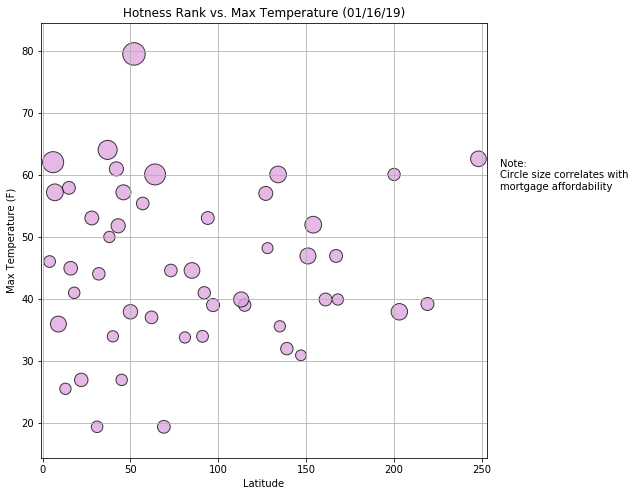

In [92]:
from datetime import date
today = date.today().strftime('%m/%d/%y')

# Obtain the x and y coordinates
x_axis = mort_wx_df['hrank']
y_axis = mort_wx_df['Max Temp']
size = mort_wx_df['2018-09']

plt.figure(figsize=[8, 8])

# Build the scatter plots
plt.scatter(x_axis, y_axis, marker="o", s = size*1000, facecolors="plum", 
            edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.xlim(mort_wx_df['hrank'].min()-5, mort_wx_df['hrank'].max()+5)
plt.ylim(mort_wx_df['Max Temp'].min()-5, mort_wx_df['Max Temp'].max()+5)

# Incorporate a text label
plt.title(f"Hotness Rank vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.text(260, 60, 'Note:\nCircle size correlates with \nmortgage affordability', horizontalalignment='left',
         verticalalignment='center')

# Save Figure
# plt.savefig("HotnessMaxTemp.png", bbox_inches="tight")

Text(260, 60, 'Note:\nCircle size correlates with \nmortgage affordability')

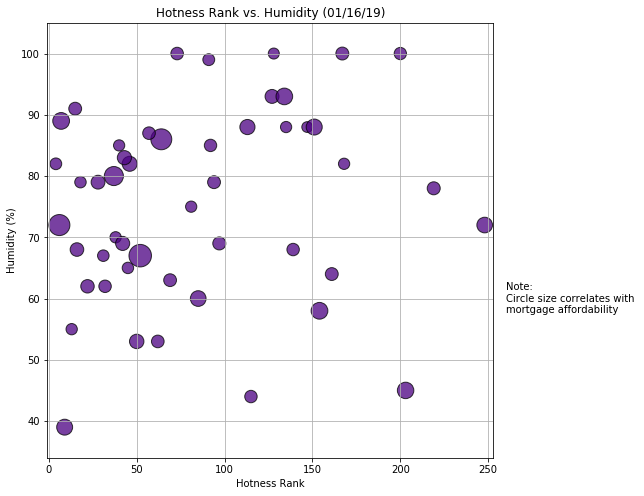

In [95]:
# Obtain the x and y coordinates
x_axis = mort_wx_df['hrank']
y_axis = mort_wx_df['Humidity']
size = mort_wx_df['2018-09']

plt.figure(figsize=[8, 8])
# Build the scatter plots
plt.scatter(x_axis, y_axis, marker="o", s = size*1000, facecolors="indigo", 
            edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.xlim(mort_wx_df['hrank'].min()-5, mort_wx_df['hrank'].max()+5)
plt.ylim(mort_wx_df['Humidity'].min()-5, 105)

# Incorporate a text label
plt.title(f"Hotness Rank vs. Humidity ({today})")
plt.xlabel("Hotness Rank")
plt.ylabel("Humidity (%)")
plt.text(260, 60, 'Note:\nCircle size correlates with \nmortgage affordability', horizontalalignment='left',
         verticalalignment='center')

# Save Figure
# plt.savefig("HotHumid.png", bbox_inches="tight")

In [98]:
mort_wx_df.dtypes

CityName       object
Cloudiness      int64
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
RegionID      float64
RegionName     object
hrank         float64
2018-09       float64
dtype: object

In [99]:
# Google heatmap for hotness ranks
# Import dependencies
import gmaps

# Google API Key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

# List for holding lat_lngs and cities

# Store latitude and longitude in locations
locations = mort_wx_df[["Lat", "Lng"]]

# Rating as Hotness Rank
rating = mort_wx_df["hrank"]

In [101]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))